In [2]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random
import scipy.optimize

%matplotlib inline

In [75]:
def spec_heat_ps(energy_list, T, N):
    """Compute the specific heat per spin for an input list of energy values at temperature T and lattice sites N"""
    
    if type(energy_list) is list:
        energy_list = np.array(energy_list)
    
    c = (1/(T**2 * N)) * np.var(energy_list)
    
    return c

def sus(mag_list, T, N):
    """Compute susceptibility for an input list of magnetization values at temperature T and lattice sites N"""
    
    if type(mag_list) is list:
        mag_list = np.array(mag_list)
    
    chi = (1/(T*N)) * np.var(mag_list)
    
    return chi

In [136]:
def bootstrap_mean(values, n):
    """Uses the bootstrap method to compute the error in the mean of a given list of values"""
    
    ns = len(values)
    
    means = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(values, ns)
        means[i] = np.mean(samples)
    
    error = np.std(means)
    
    return error
    
    
    
    
def bootstrap_c(energies, T, N, n):
    """Uses bootstrap to compute the error in the specific heat for an input set of energies"""
    
    ns = len(energies)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(energies, ns)
        values[i] = spec_heat_ps(samples, T, N)
        
    error = np.std(values)
    
    return error





def bootstrap_s(magps, T, N, n):
    """Uses bootstrap to compute the error in the susceptibility for an input set of magnetization"""
    
    ns = len(magps)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(magps, ns)
        values[i] = sus(samples, T, N)
    
    error = np.std(values)
    
    return error
        

In [11]:
eneps_listv1 = np.load('eneps_list50.npy')[()]
spec_heatv1 = np.load('spec_heat50.npy')[()]
magps_listv1 = np.load('magps_list50.npy')[()]
mag_susv1 = np.load('mag_sus50.npy')[()]
energy_dictv1 = np.load('ene_dict50.npy')[()]
mag_dictv1 = np.load('mag_dict50.npy')[()]

eneps_listv2 = np.load('eneps_list50v2.npy')[()]
spec_heatv2 = np.load('spec_heat50v2.npy')[()]
magps_listv2 = np.load('magps_list50v2.npy')[()]
mag_susv2 = np.load('mag_sus50v2.npy')[()]
energy_dictv2 = np.load('ene_dict50v2.npy')[()]
mag_dictv2 = np.load('mag_dict50v2.npy')[()]

eneps_listv3 = np.load('eneps_list50v3.npy')[()]
spec_heatv3 = np.load('spec_heat50v3.npy')[()]
magps_listv3 = np.load('magps_list50v3.npy')[()]
mag_susv3 = np.load('mag_sus50v3.npy')[()]
energy_dictv3 = np.load('ene_dict50v3.npy')[()]
mag_dictv3 = np.load('mag_dict50v3.npy')[()]

In [5]:
temps = [i for i in np.arange(1.6, 2.91, 0.01)]

In [22]:
absmagmeanv1 = []
absshv1 = []

for k in keys:
    absmag = [abs(m) for m in mag_dictv1[k]]
    absmagmeanv1.append(np.mean(absmag))
    absshv1.append(np.var(absmag))
    
absmagmeanv1 = np.array(absmagmeanv2)/2500
absshv1 = np.array(absshv2)/2500

for i in range(len(temps)):
    absshv1[i] = absshv1[i]/temps[i]

In [21]:
absmagmeanv3 = []
absshv3 = []

for k in keys:
    absmag = [abs(m) for m in mag_dictv3[k]]
    absmagmeanv3.append(np.mean(absmag))
    absshv3.append(np.var(absmag))
    
absmagmeanv3 = np.array(absmagmeanv3)/2500
absshv3 = np.array(absshv3)/2500

for i in range(len(temps)):
    absshv3[i] = absshv3[i]/temps[i]

In [4]:
keys = list(mag_dictv2.keys())

In [6]:
absmagmeanv2 = []
absshv2 = []

for k in keys:
    absmag = [abs(m) for m in mag_dictv2[k]]
    absmagmeanv2.append(np.mean(absmag))
    absshv2.append(np.var(absmag))
    
absmagmeanv2 = np.array(absmagmeanv2)/2500
absshv2 = np.array(absshv2)/2500

for i in range(len(temps)):
    absshv2[i] = absshv2[i]/temps[i]

Text(0.5,0,'Temperature')

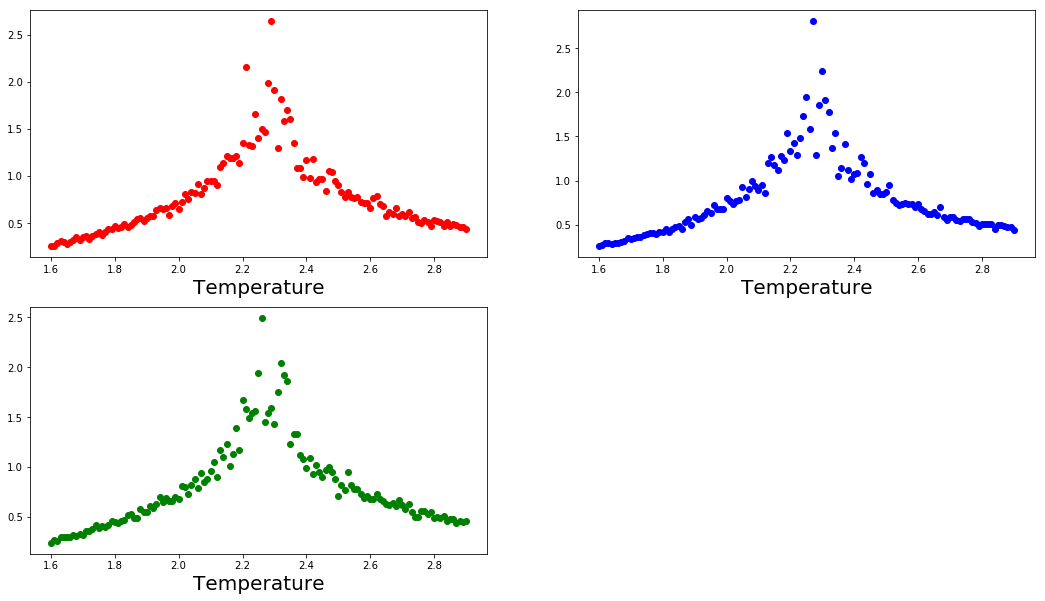

In [231]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, spec_heatv1, 'ro')
plt.xlabel("Temperature", fontsize=20)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heatv2, 'bo')
plt.xlabel("Temperature", fontsize=20)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, spec_heatv3, 'go')
plt.xlabel("Temperature", fontsize=20)

In [7]:
def power(x, a, b, c):
    return a*((b-x)/b)**c

In [247]:
def powerpos(x, a, b, c):
    return a*((x-b)/b)**c

In [8]:
magtest = np.delete(mag_susv2, 67)
temptest = np.delete(temps, 67)

Text(0.5,0,'Temperature')

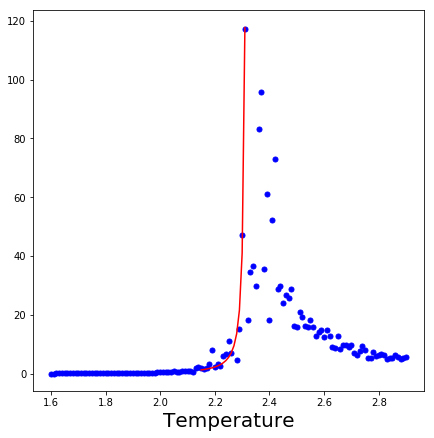

In [209]:
plt.figure(figsize=(7,7)) 
plt.plot(temptest, magtest, 'bo', markersize = 5)
plt.plot(temps[55:72], f_S, 'r')
plt.xlabel("Temperature", fontsize=20)

In [221]:
scipy.optimize.curve_fit(power, temptest[5:71], magtest[5:71], p0 = [.1, 2.35, -1.75], sigma = sus_test[5:71], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.00808415,  2.32030466, -1.76424189]),
 array([[ 1.25195015e-06, -1.54316431e-06,  7.50834408e-05],
        [-1.54316431e-06,  3.04593697e-06, -1.18904715e-04],
        [ 7.50834408e-05, -1.18904715e-04,  5.26819632e-03]]))

In [46]:
f_S = [power(x, 0.01660648,  2.32132378, -1.66565592) for x in temps[55:72]]

Text(0.5,0,'Temperature')

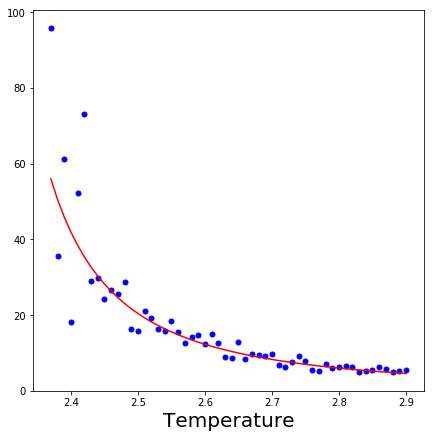

In [268]:
plt.figure(figsize=(7,7)) 
plt.plot(temptest[76:], magtest[76:], 'bo', markersize = 5)
plt.plot(temptest[76:], f_sp, 'r')
plt.xlabel("Temperature", fontsize=20)

In [271]:
scipy.optimize.curve_fit(powerpos, temptest[76:-5], magtest[76:-5], p0 = [.1, 2.35, -1.75], sigma = sus_test[76:-5],maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.51202002,  2.16533679, -1.9824793 ]),
 array([[0.04185997, 0.02163533, 0.12747174],
        [0.02163533, 0.01383928, 0.07592247],
        [0.12747174, 0.07592247, 0.42653635]]))

In [267]:
f_sp = [powerpos(x, 0.61974852, 2.20370551, -1.74289572) for x in temptest[76:]]

In [64]:
f_m = [power(x, 1.17430556, 2.2854002, 0.12080918) for x in temps[40:69]]

Text(0,0.5,'Magnetization')

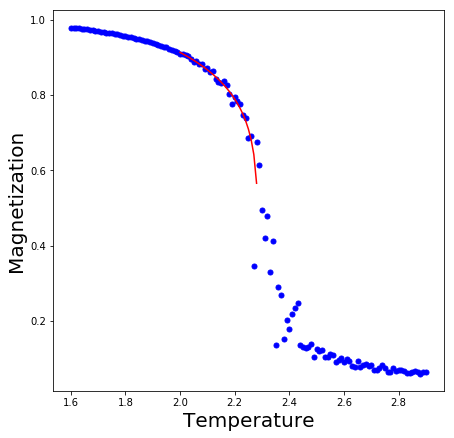

In [239]:
plt.figure(figsize=(7,7)) 
plt.plot(temps, absmagmeanv2, 'bo', markersize = 5)
plt.plot(temps[40:69], f_m, 'r')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Magnetization", fontsize=20)

In [143]:
scipy.optimize.curve_fit(power, temps[50:67], absmagmeanv2[50:67], p0 = [1, 2.35, 0.125], sigma = mag_errors[30:67], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([1.18568553, 2.28694199, 0.12320771]),
 array([[0.00256788, 0.00058717, 0.00095961],
        [0.00058717, 0.00015994, 0.00022848],
        [0.00095961, 0.00022848, 0.00036243]]))

Text(0.5,0,'Temperature')

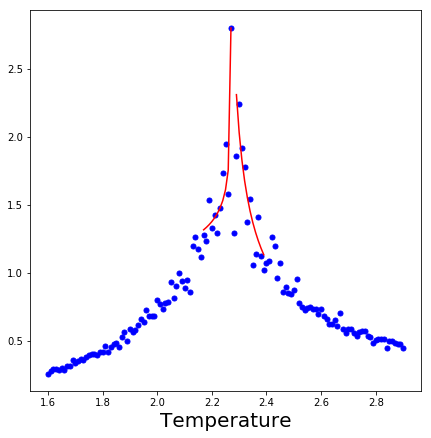

In [331]:
plt.figure(figsize=(7,7)) 
plt.plot(temps, spec_heatv2, 'bo', markersize = 5)
plt.plot(temps[57:68], f_sh, 'r')
plt.plot(temps[69:80], f_shp, 'r')
plt.xlabel("Temperature", fontsize=20)

In [327]:
scipy.optimize.curve_fit(power, temps[57:68], spec_heatv2[57:68], p0 = [1, 2.3, 0], sigma = sh_errors[57:68], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.88736154,  2.2702522 , -0.12622309]),
 array([[ 3.02420062e-02, -8.60772027e-05,  8.44323959e-03],
        [-8.60772027e-05,  3.12371832e-07, -2.54761603e-05],
        [ 8.44323959e-03, -2.54761603e-05,  2.43414784e-03]]))

In [328]:
f_sh = [power(x, 0.88736154,  2.2702522 , -0.12622309) for x in temps[57:68]]

Text(0.5,0,'Temperature')

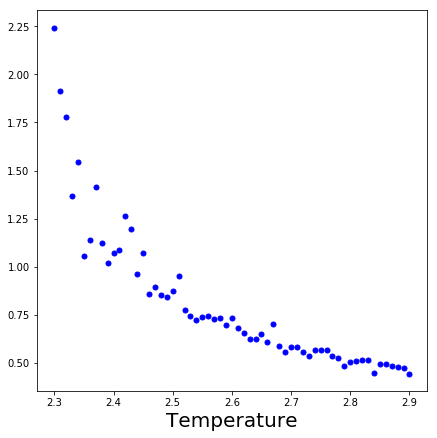

In [310]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[70:], spec_heatv2[70:], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)

In [308]:
scipy.optimize.curve_fit(powerpos, temps[70:-10], spec_heatv2[70:-10], p0 = [1, 2.2, 0], sigma = sh_errors[70:-10], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.23996159,  2.25156583, -0.55632244]),
 array([[0.00037822, 0.00026646, 0.00107467],
        [0.00026646, 0.00025884, 0.00086797],
        [0.00107467, 0.00086797, 0.0032541 ]]))

In [316]:
f_shp = [powerpos(x, 0.23996159, 2.25156583, -0.55632244) for x in temps[69:80]]

# Computing Error

In [112]:
absmag = np.zeros((131, 2500))

for i in range(131):
    for j in range(2500):
        absmag[i, j] = abs(mag_dictv2[keys[i]][j])

In [115]:
mag_errors = []

for i in range(131):
    mag_errors.append(bootstrap_mean(absmag[i,:], 1000))
    
mag_errors = np.array(mag_errors)/2500

In [236]:
sus_errors = []

for i in range(131):
    sus_errors.append(bootstrap_s(absmag[i,:], temps[i], 2500, 1000))

In [210]:
sus_test = np.delete(sus_errors, 67)

In [237]:
sh_errors = []

for i in range(131):
    sh_errors.append(bootstrap_c(energy_dictv2[keys[i]], temps[i], 2500, 1000))

In [145]:
eneps_list8 = np.load('eneps_list8.npy')
spec_heat8 = np.load('spec_heat8.npy')
magps_list8 = np.load('magps_list8.npy')
mag_sus8 = np.load('mag_sus8.npy')
energy_dict8 = np.load('ene_dict8.npy')[()]
mag_dict8 = np.load('mag_dict8.npy')[()]

In [150]:
absmag8 = np.zeros((131, 400))

for i in range(131):
    for j in range(400):
        absmag8[i, j] = abs(mag_dict8[keys[i]][j])

In [151]:
mag_errors8 = []

for i in range(131):
    mag_errors8.append(bootstrap_mean(absmag8[i,:], 1000))
    
mag_errors8 = np.array(mag_errors8)/64

Text(0,0.5,'Magnetization')

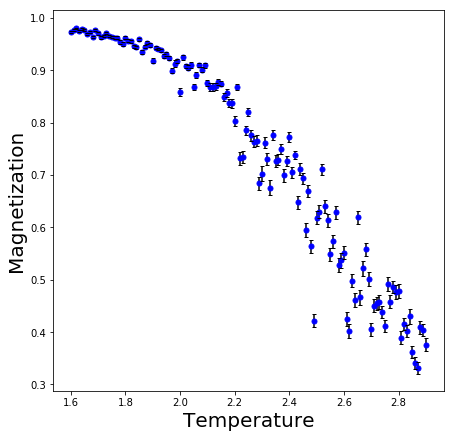

In [161]:
plt.figure(figsize=(7,7)) 
plt.plot(temps, magps_list8, 'bo', markersize = 5)
plt.errorbar(temps, magps_list8, yerr = mag_errors8, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Magnetization", fontsize=20)